In [1]:
import numpy as np 
import pandas as pd 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#import numpy as np
#import pandas as pd

## Import Data

In [3]:
train = pd.read_csv("/content/drive/My Drive/predictive_analysis_project/COLAB file/train.csv")
test = pd.read_csv("/content/drive/My Drive/predictive_analysis_project/COLAB file/test.csv")
submission = pd.read_csv("/content/drive/My Drive/predictive_analysis_project/COLAB file/submission.csv")
train.tail()


,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
20575,29366,NaN,Zimbabwe,2020-03-27,5.0,1.0
20576,29367,NaN,Zimbabwe,2020-03-28,7.0,1.0
20577,29368,NaN,Zimbabwe,2020-03-29,7.0,1.0
20578,29369,NaN,Zimbabwe,2020-03-30,7.0,1.0
20579,29370,NaN,Zimbabwe,2020-03-31,8.0,1.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20580 entries, 0 to 20579
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              20580 non-null  int64  
 1   Province_State  8750 non-null   object 
 2   Country_Region  20580 non-null  object 
 3   Date            20580 non-null  object 
 4   ConfirmedCases  20580 non-null  float64
 5   Fatalities      20580 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 964.8+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12642 entries, 0 to 12641
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ForecastId      12642 non-null  int64 
 1   Province_State  5375 non-null   object
 2   Country_Region  12642 non-null  object
 3   Date            12642 non-null  object
dtypes: int64(1), object(3)
memory usage: 395.2+ KB


# Data Cleaning

In [6]:
# Format date
train["Date"] = train["Date"].apply(lambda x: x.replace("-",""))
train["Date"]  = train["Date"].astype(int)
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,20200122,0.0,0.0
1,2,NaN,Afghanistan,20200123,0.0,0.0
2,3,NaN,Afghanistan,20200124,0.0,0.0
3,4,NaN,Afghanistan,20200125,0.0,0.0
4,5,NaN,Afghanistan,20200126,0.0,0.0


### Drop NaNs

In [7]:
# drop nan's
train = train.drop(['Province_State'],axis=1)
train = train.dropna()
train.isnull().sum()

Id                0
Country_Region    0
Date              0
ConfirmedCases    0
Fatalities        0
dtype: int64

In [8]:
# Do same to Test data
test["Date"] = test["Date"].apply(lambda x: x.replace("-",""))
test["Date"]  = test["Date"].astype(int)
# deal with nan's for lat and lon
#test = test.dropna()
test.isnull().sum()

ForecastId           0
Province_State    7267
Country_Region       0
Date                 0
dtype: int64

### Prepare Training

In [9]:
x = train[['Date']]
y1 = train[['ConfirmedCases']]
y2 = train[['Fatalities']]
x_test = test[['Date']]

In [10]:
from sklearn.ensemble import RandomForestClassifier
Tree_model = RandomForestClassifier(max_depth=200, random_state=0)

### Train Confirmed Cases Tree

In [11]:
##
Tree_model.fit(x,y1)
pred1 = Tree_model.predict(x_test)
pred1 = pd.DataFrame(pred1)
pred1.columns = ["ConfirmedCases_prediction"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [12]:
pred1.head()

,ConfirmedCases_prediction
0,1.0
1,1.0
2,1.0
3,1.0
4,3.0


### Train Deaths Tree

In [13]:
Tree_model.fit(x,y2)
pred2 = Tree_model.predict(x_test)
pred2 = pd.DataFrame(pred2)
pred2.columns = ["Death_prediction"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [16]:
pred2

,Death_prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
12637,0.0
12638,0.0
12639,0.0
12640,0.0


### Prepare for Submission

In [14]:
Sub = pd.read_csv("/content/drive/My Drive/predictive_analysis_project/COLAB file/submission.csv")
sub_new = Sub[["ForecastId"]]
sub_new

,ForecastId
0,1
1,2
2,3
3,4
4,5
...,...
12637,12638
12638,12639
12639,12640
12640,12641


In [15]:
submit = pd.concat([pred1,pred2,sub_new],axis=1)
submit.head()

,ConfirmedCases_prediction,Death_prediction,ForecastId
0,1.0,0.0,1
1,1.0,0.0,2
2,1.0,0.0,3
3,1.0,0.0,4
4,3.0,0.0,5


In [17]:
# Clean
submit.columns = ['ConfirmedCases', 'Fatalities', 'ForecastId']
submit = submit[['ForecastId','ConfirmedCases', 'Fatalities']]

submit["ConfirmedCases"] = submit["ConfirmedCases"].astype(int)
submit["Fatalities"] = submit["Fatalities"].astype(int)

In [18]:
submit.describe()

,ForecastId,ConfirmedCases,Fatalities
count,12642.000000,12642.000000,12642.0
mean,6321.500000,7.255814,0.0
std,3649.575386,2.965758,0.0
min,1.000000,1.000000,0.0
25%,3161.250000,3.000000,0.0
50%,6321.500000,9.000000,0.0
75%,9481.750000,9.000000,0.0
max,12642.000000,9.000000,0.0


In [19]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12642 entries, 0 to 12641
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ForecastId      12642 non-null  int64
 1   ConfirmedCases  12642 non-null  int64
 2   Fatalities      12642 non-null  int64
dtypes: int64(3)
memory usage: 296.4 KB


In [20]:
 Sub = submit
 Sub.to_csv('submission.csv', index=False)

In [21]:
Sub

,ForecastId,ConfirmedCases,Fatalities
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,0
4,5,3,0
...,...,...,...
12637,12638,9,0
12638,12639,9,0
12639,12640,9,0
12640,12641,9,0


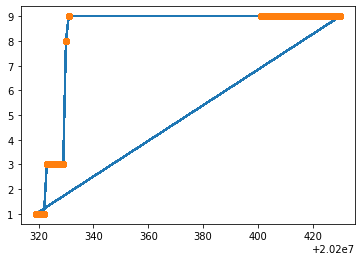

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_test, pred1, '--', label='fitted')
ax.plot(x_test, pred1, 'o', label='Confirmed Data')

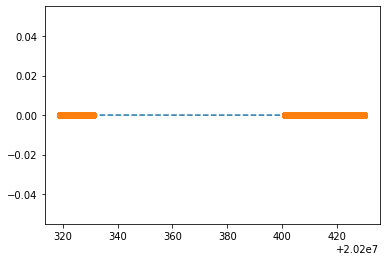

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_test, pred2, '--', label='fitted')
ax.plot(x_test, pred2, 'o', label='Fatality')

In [29]:
pred2.describe() # pred2 is a fatalities based on confirmed cases

,Death_prediction
count,12642.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [30]:
pred1.describe() # pred1 is a confirmed cases

,ConfirmedCases_prediction
count,12642.000000
mean,7.255814
std,2.965758
min,1.000000
25%,3.000000
50%,9.000000
75%,9.000000
max,9.000000
